In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_L")
dataset_ADNI = pd.read_csv(dataset_path)
dataset_ADNI.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,1140,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1051,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,15,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,680,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,324,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


In [3]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_PL")
dataset_OASIS = pd.read_csv(dataset_path)
dataset_OASIS.head()

,Label,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,30879,0,64.585900,0,27.0,0.377501,128.715226,0.422342,115.630163,15.181458,...,286.270009,0.289728,206.373786,44.577974,539.225137,3.320292,22924.739100,3.3445,2251,7338.2
1,31129,0,68.076660,2,20.0,0.657212,51.830551,0.557254,84.225204,8.530596,...,282.873623,0.310507,206.276556,39.697933,542.232602,2.864138,18182.687670,2.9605,2924,5438.6
2,30605,1,76.221760,1,28.0,0.520032,86.558742,0.594543,123.662642,13.400504,...,244.274039,0.370189,201.216707,46.081559,560.592790,3.415186,28045.350990,3.3145,4042,8434.4
3,30039,0,73.221085,0,30.0,0.396133,60.731686,0.596733,122.546512,15.571183,...,226.713342,0.517430,232.983710,30.461877,705.221498,2.937422,1196.160472,3.1505,3485,7476.2
4,30079,0,45.872690,0,30.0,0.404800,108.808540,0.520363,98.065558,13.483247,...,202.074647,0.354851,169.528802,50.680275,476.040561,3.017047,47743.254120,3.5420,3964,8021.8


In [4]:
# Mapping from OASIS column names to ADNI column names
oasis_to_adni = {
    'Label': 'RID',
    'Gender': 'Gender',
    'Age': 'Ageatscreening',
    'MMSE': 'MMSE0m',
    'DIAGNOSIS': 'Diagnosis',
    'Hip ASM': 'HipsASMbaseline',
    'Hip Contrast': 'HipsContrastbaseline',
    'Hip Correlation': 'HipsCorelationbaseline',
    'Hip Variance ': 'HipsVariancebaseline',
    'Hip Sum Average': 'HipsSumAveragebaseline',
    'Hip Sum Variance': 'HipsSumVariancebaseline',
    'Hip Entropy': 'HipsEntropybaseline',
    'Hip Clusterhade': 'HipsClusterShadebaseline',
    'ERC ASM': 'ERCsASMbaseline',
    'ERC CONTRAST': 'ERCsContrastbaseline',
    'ERC CORRELATION': 'ERCsCorelationbaseline',
    'ERC VARIANCE ': 'ERCsVariancebaseline',
    'ERC SUM AVERAGE': 'ERCsSumAveragebaseline',
    'ERC SUM VARIANCE': 'ERCsSumVariancebaseline',
    'ERC ENTROPY': 'ERCsEntropybaseline',
    'ERC CLUSTER SHADE': 'ERCsClusterShadebaseline',
    'ERCs_thicknessbaseline': 'ERCs_thicknessbaseline',  # already same
    'ERCsVolumebaseline': 'ERCsVolumebaseline',          # already same
    'TOTAL_HIPPOCAMPUS_VOLUME': 'HipposcampusVolumebaseline'
}

# Rename OASIS dataset columns to match ADNI
dataset_OASIS = dataset_OASIS.rename(columns=oasis_to_adni)

# Optional: check the new column names
print(dataset_OASIS.columns)

Index(['RID', 'Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m',
       'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')


In [5]:
dataset_ADNI.columns

Index(['RID', 'Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m',
       'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [6]:
dataset_OASIS.columns

Index(['RID', 'Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m',
       'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [7]:
col = ['HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def split_and_scale_by_subject(dataset, target_col, numeric_cols, test_size=0.3, random_state=42):

    # -----------------------------
    # 1. Subject-level split
    # -----------------------------
    subjects = dataset['RID'].unique()
    first_diag_per_subject = dataset.groupby('RID')[target_col].first()
    
    train_subs, test_subs = train_test_split(
        subjects,
        test_size=test_size,
        random_state=random_state,
        stratify=first_diag_per_subject
    )
    
    train_df = dataset[dataset['RID'].isin(train_subs)].copy()
    test_df  = dataset[dataset['RID'].isin(test_subs)].copy()
    
    # Separate features and target
    y_train = train_df[target_col]
    y_test  = test_df[target_col]
    X_train = train_df.drop(columns=[target_col])
    X_test  = test_df.drop(columns=[target_col])
    
    # -----------------------------
    # 2. Check for overlap
    # -----------------------------
    overlap_subjects = set(train_df['RID']).intersection(set(test_df['RID']))
    if len(overlap_subjects) == 0:
        print("No subjects appear in both train and test sets.")
    else:
        print(f"Overlapping subjects found: {overlap_subjects}")
    
    print(f"Number of subjects in train: {len(train_df['RID'].unique())}")
    print(f"Number of subjects in test: {len(test_df['RID'].unique())}")
    
    # -----------------------------
    # 3. Scale selected numeric columns
    # -----------------------------
    scaler = StandardScaler()
    
    X_train_scaled = X_train.copy()
    X_train_scaled[numeric_cols] = pd.DataFrame(
        scaler.fit_transform(X_train[numeric_cols]),
        columns=numeric_cols,
        index=X_train.index
    )
    
    X_test_scaled = X_test.copy()
    X_test_scaled[numeric_cols] = pd.DataFrame(
        scaler.transform(X_test[numeric_cols]),
        columns=numeric_cols,
        index=X_test.index
    )
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [9]:
X_train_oasis, X_test_oasis, y_train_oasis, y_test_oasis = split_and_scale_by_subject(
    dataset=dataset_OASIS,
    target_col="Diagnosis",
    numeric_cols=col,
    test_size=0.3,
    random_state=42
)

# For ADNI dataset
X_train_adni, X_test_adni, y_train_adni, y_test_adni = split_and_scale_by_subject(
    dataset=dataset_ADNI,
    target_col="Diagnosis",
    numeric_cols=col,
    test_size=0.3,
    random_state=42
)

No subjects appear in both train and test sets.
Number of subjects in train: 508
Number of subjects in test: 219
No subjects appear in both train and test sets.
Number of subjects in train: 359
Number of subjects in test: 155


# Checking the scaled datasets for ADNI and OASIS

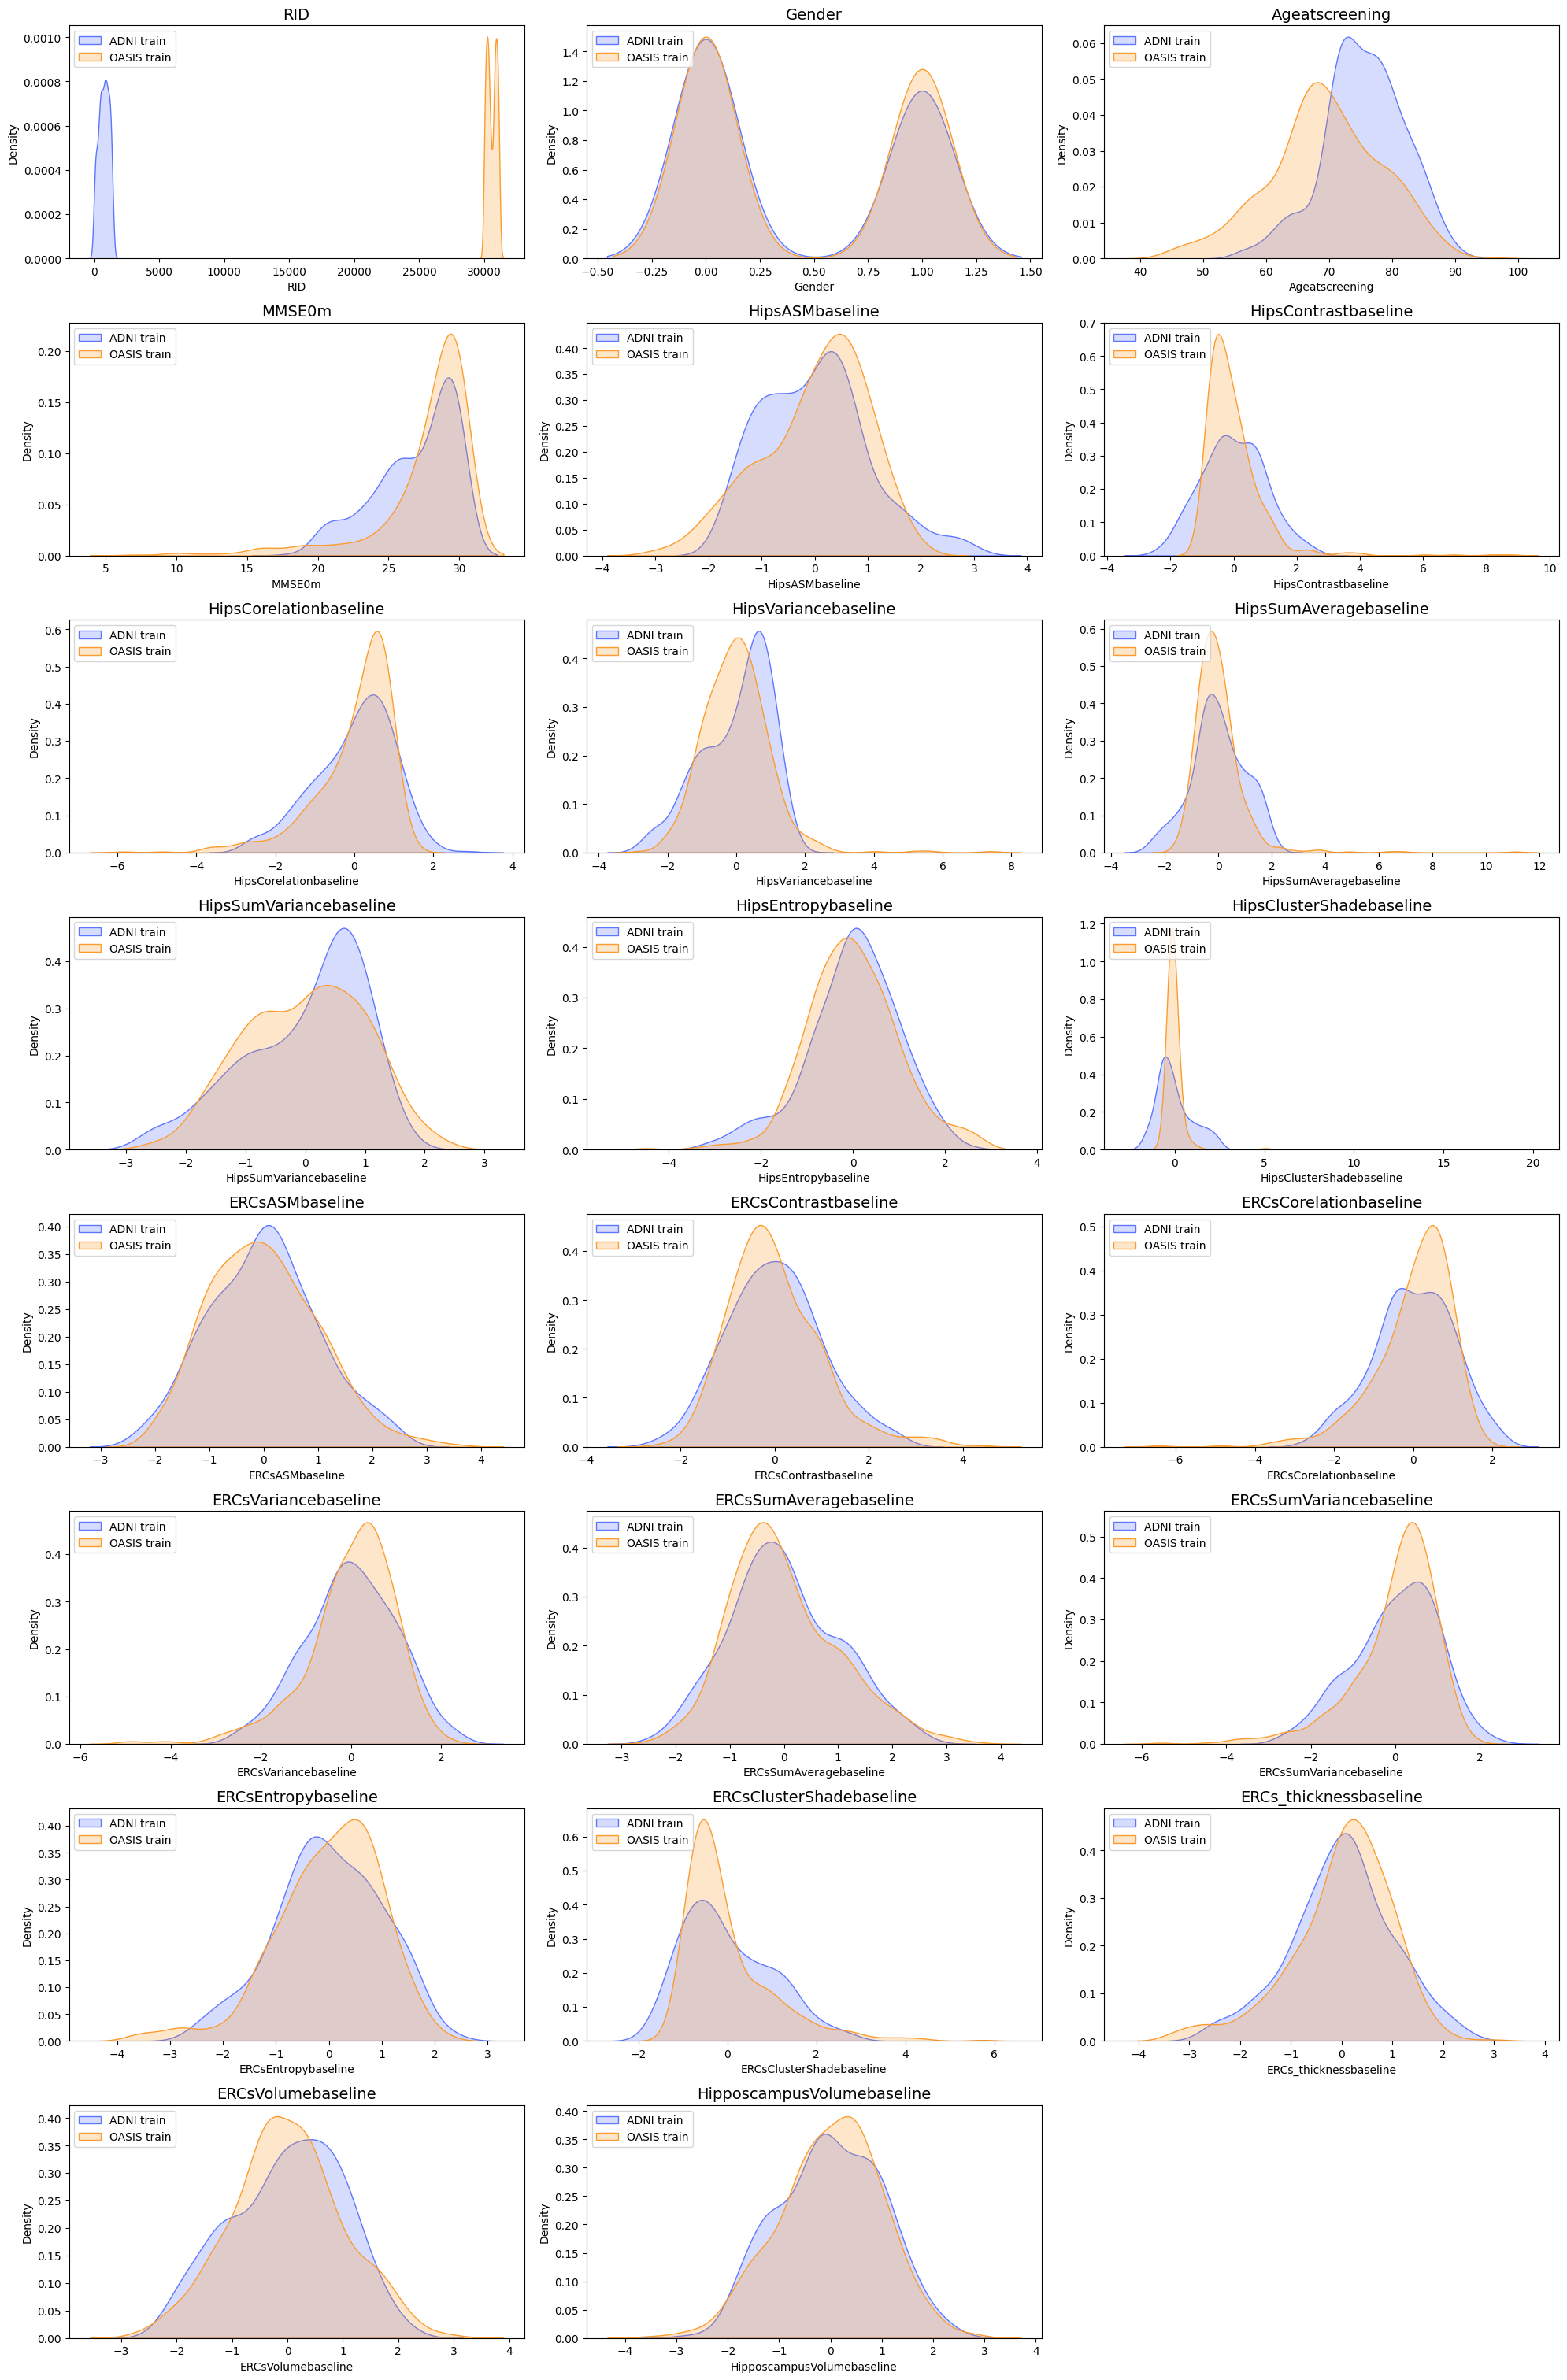

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each column in the training set using KDE plots
plt.figure(figsize=(20, 45))

for i in range(len(X_train_adni.columns)):
    plt.subplot(12, 3, i + 1)
    
    # Plot KDE for ADNI training data only
    sns.kdeplot(
        X_train_adni[X_train_adni.columns[i]],
        color="#5e76fe",
        fill=True,
        label="ADNI train"
    )
    
    # Plot KDE for OASIS training data only
    sns.kdeplot(
        X_train_oasis[X_train_oasis.columns[i]],
        color="#fc9c2e",
        fill=True,
        label="OASIS train"
    )
    
    plt.legend(loc="upper left")
    plt.title(X_train_adni.columns[i], fontsize=14)

plt.tight_layout()
plt.show()


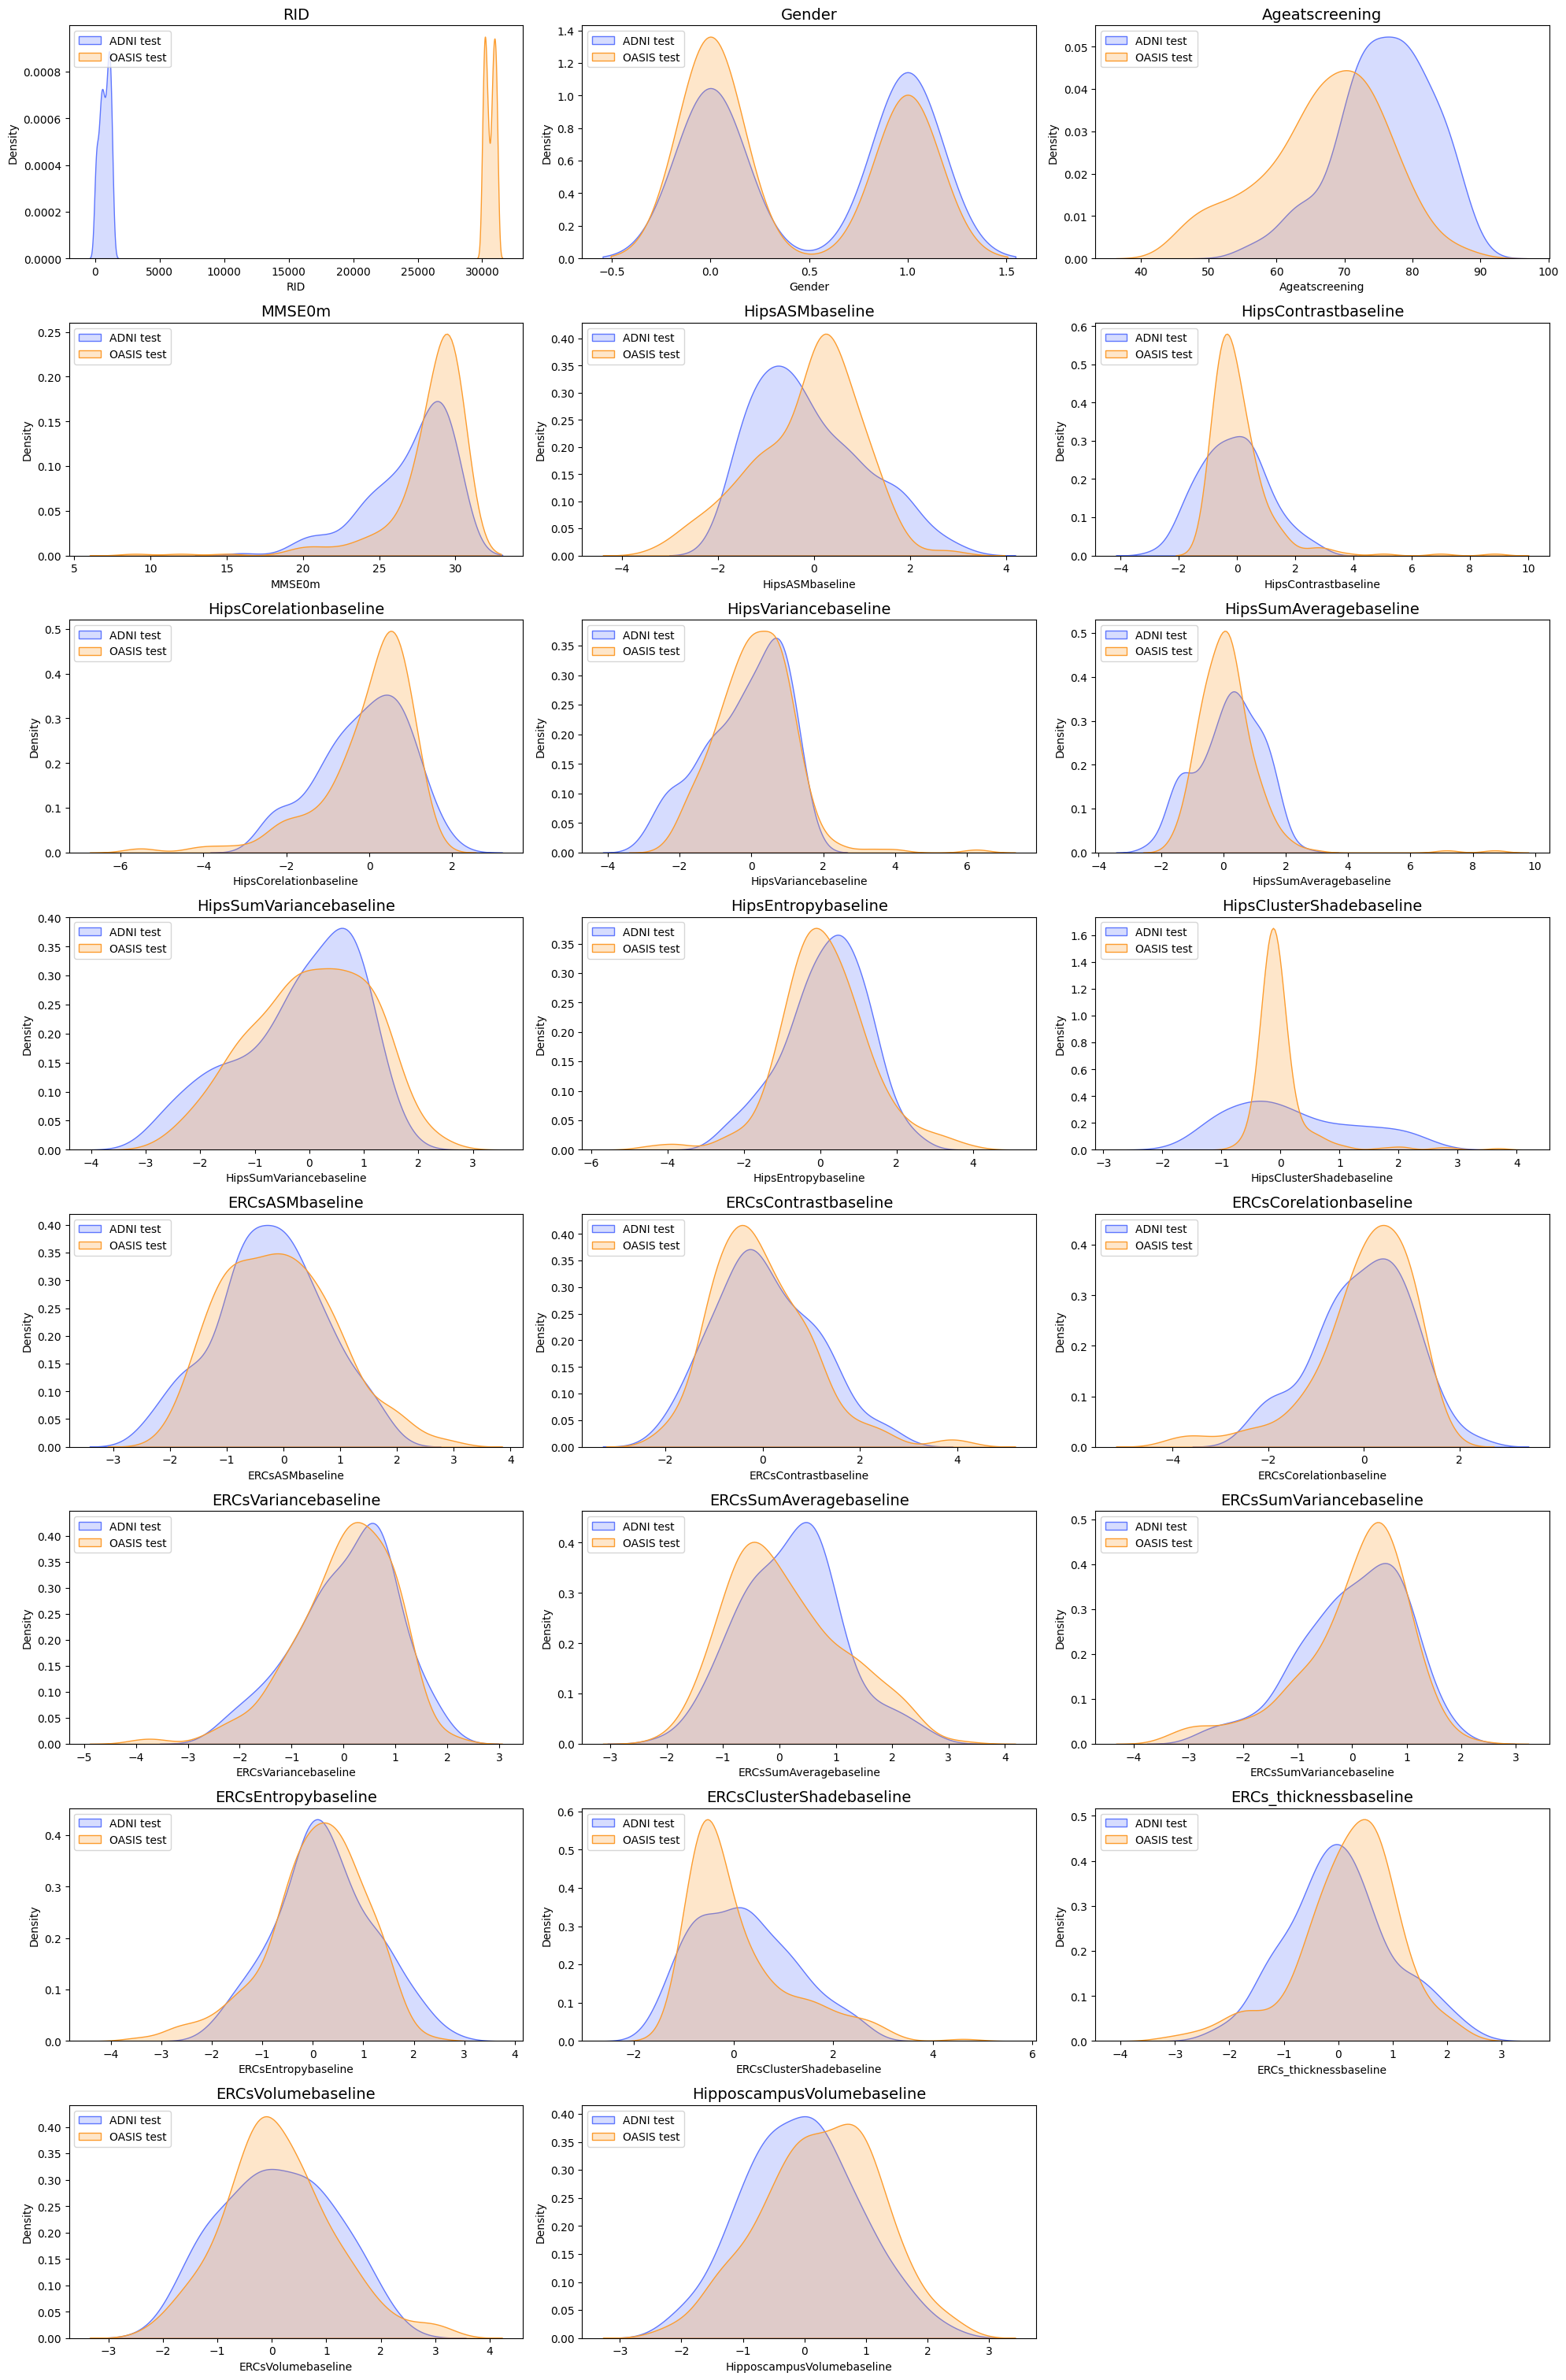

In [11]:
# Plot each column in the test set using KDE plots
plt.figure(figsize=(20, 45))

for i in range(len(X_test_adni.columns)):
    plt.subplot(12, 3, i + 1)
    
    # Plot KDE for ADNI test data only
    sns.kdeplot(
        X_test_adni[X_test_adni.columns[i]],
        color="#5e76fe",
        fill=True,
        label="ADNI test"
    )
    
    # Plot KDE for OASIS test data only
    sns.kdeplot(
        X_test_oasis[X_test_oasis.columns[i]],
        color="#fc9c2e",
        fill=True,
        label="OASIS test"
    )
    
    plt.legend(loc="upper left")
    plt.title(X_test_adni.columns[i], fontsize=14)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.utils import shuffle

X_train_merged = pd.concat([X_train_adni, X_train_oasis], axis=0, ignore_index=True)
y_train_merged = pd.concat([y_train_adni, y_train_oasis], axis=0, ignore_index=True)

X_train_merged, y_train_merged = shuffle(X_train_merged, y_train_merged, random_state=42)


X_test_merged = pd.concat([X_test_adni, X_test_oasis], axis=0, ignore_index=True)
y_test_merged = pd.concat([y_test_adni, y_test_oasis], axis=0, ignore_index=True)

X_test_merged, y_test_merged = shuffle(X_test_merged, y_test_merged, random_state=42)

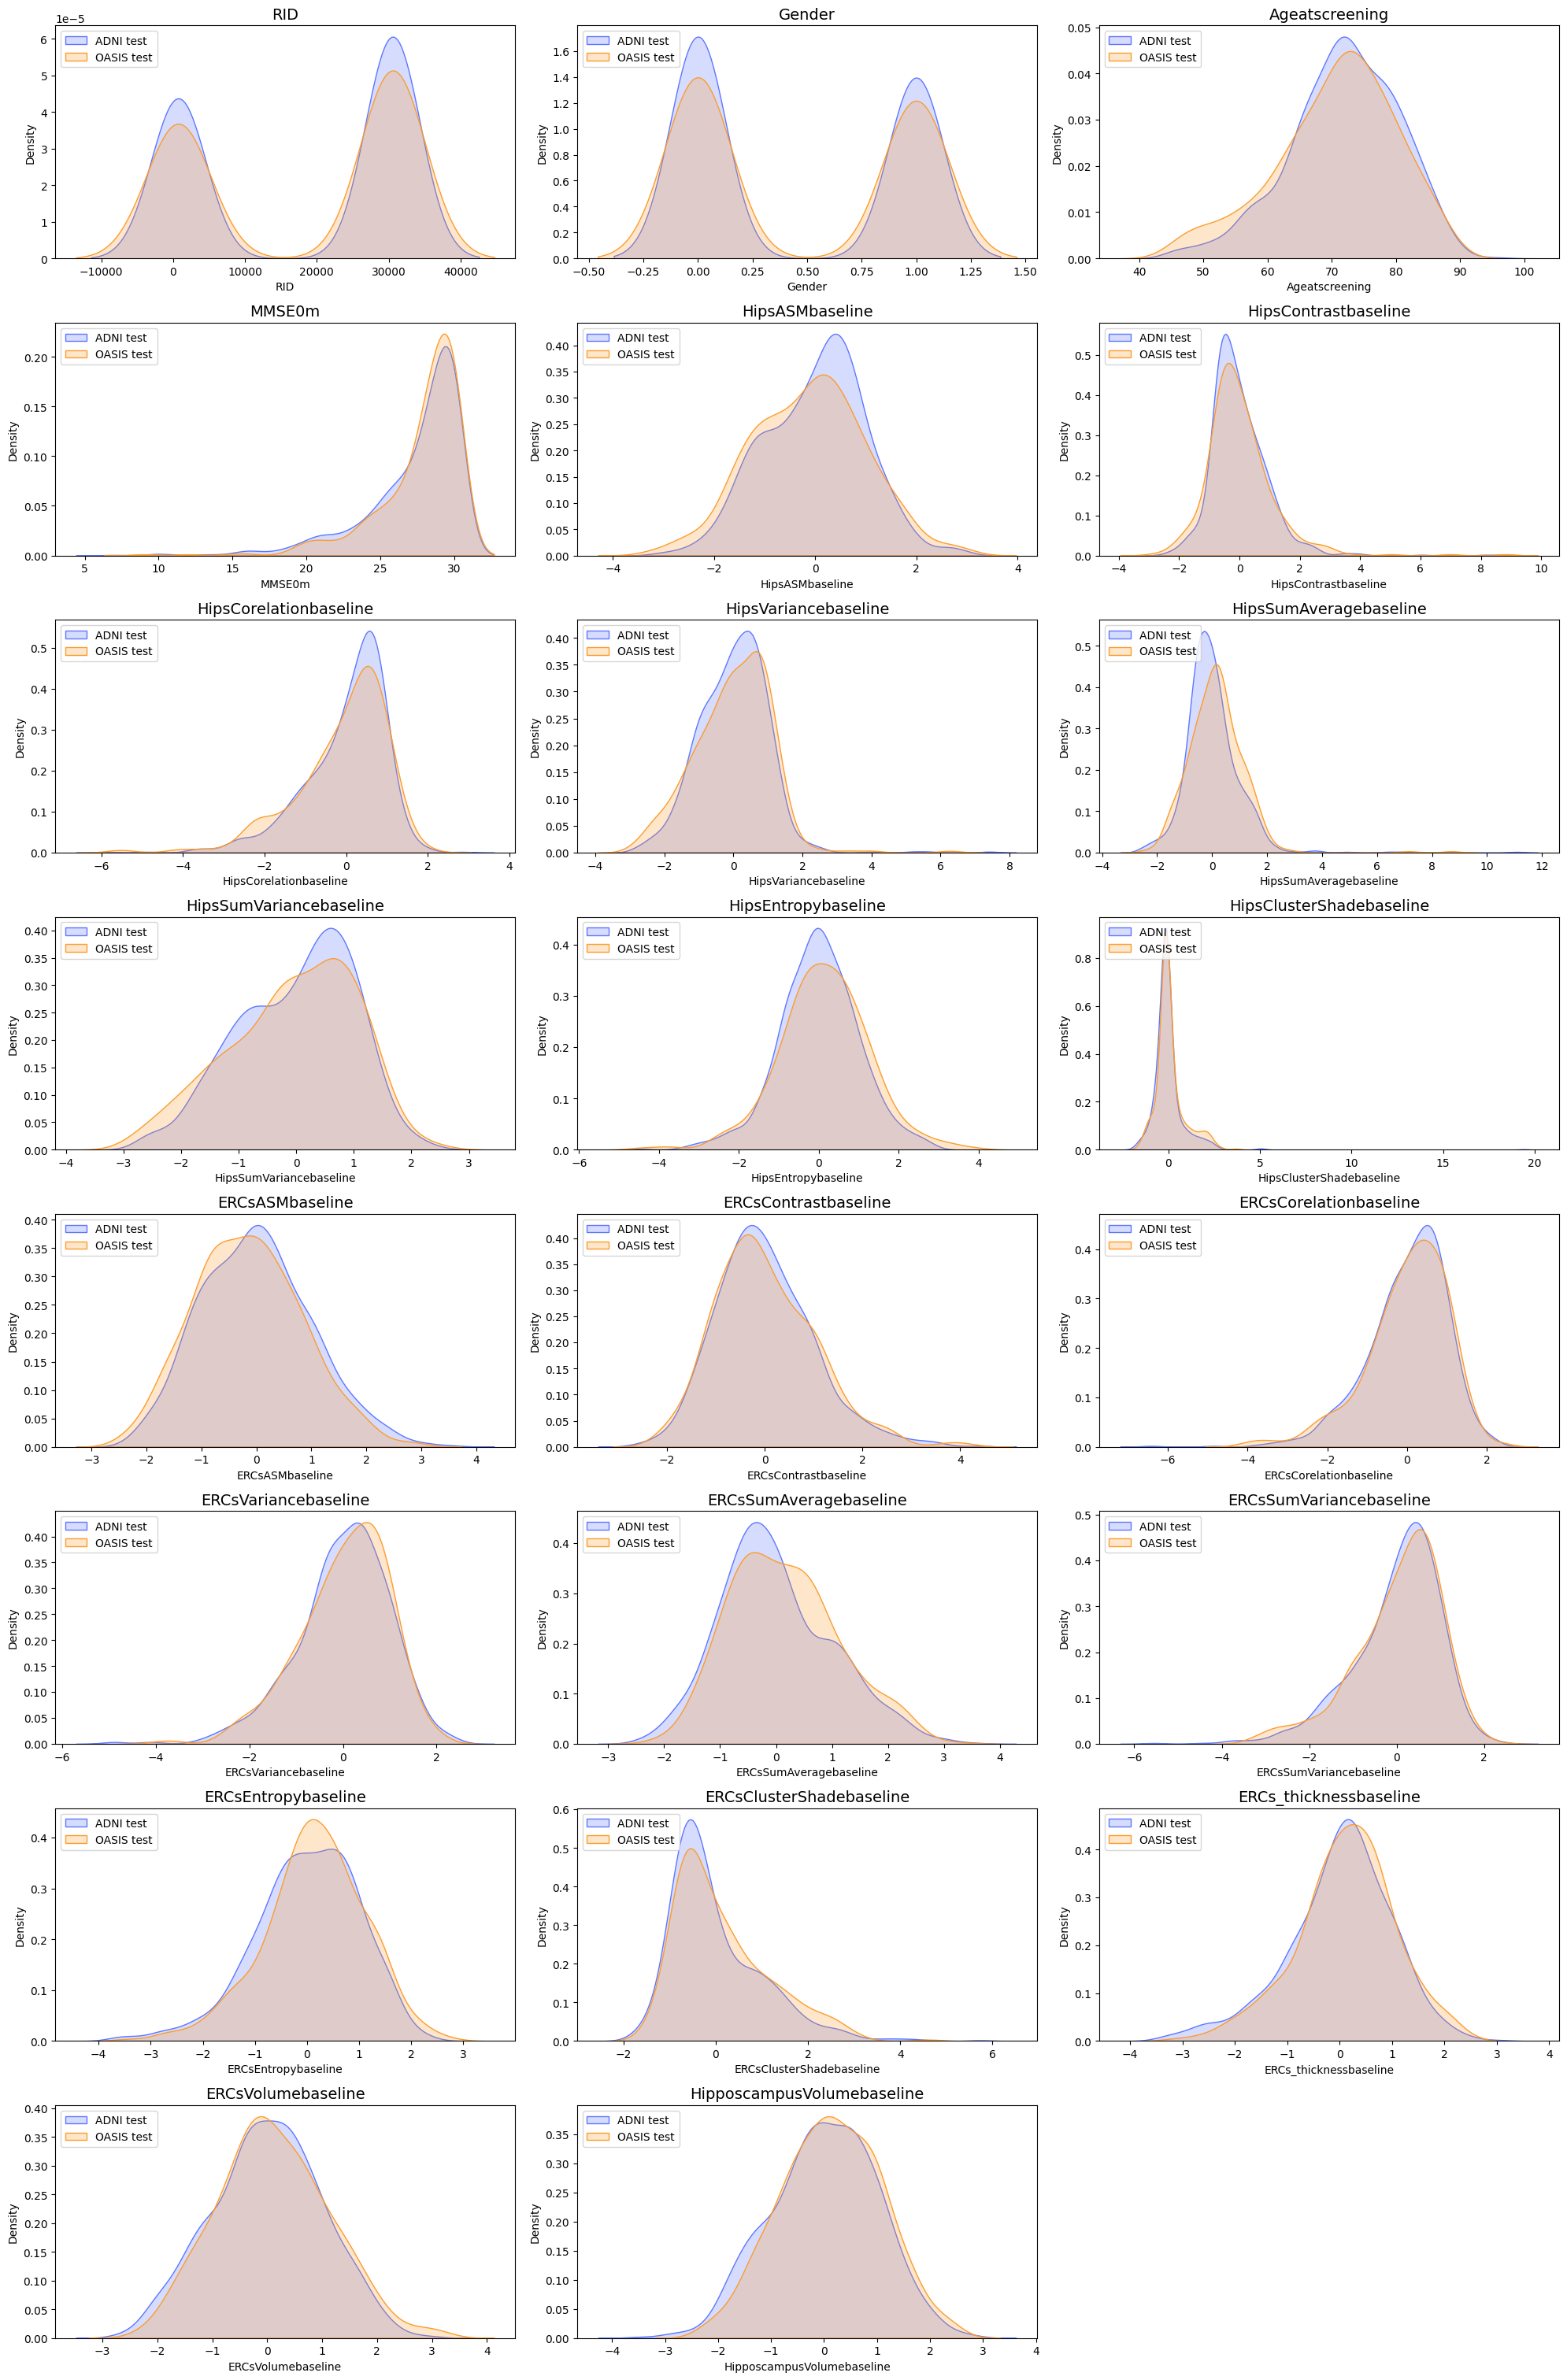

In [13]:
# Plot each column in the test set using KDE plots
plt.figure(figsize=(20, 45))

for i in range(len(X_train_merged.columns)):
    plt.subplot(12, 3, i + 1)
    
    # Plot KDE for ADNI test data only
    sns.kdeplot(
        X_train_merged[X_train_merged.columns[i]],
        color="#5e76fe",
        fill=True,
        label="ADNI test"
    )
    
    # Plot KDE for OASIS test data only
    sns.kdeplot(
        X_test_merged[X_test_merged.columns[i]],
        color="#fc9c2e",
        fill=True,
        label="OASIS test"
    )
    
    plt.legend(loc="upper left")
    plt.title(X_test_merged.columns[i], fontsize=14)

plt.tight_layout()
plt.show()

# Export

In [14]:
# Export merged datasets
X_train_merged.to_csv('C:/Users/steve/Desktop/Notebooks/Thesis-Project/datasets/processed/X_train_merged_scaled.csv', index=False)
X_test_merged.to_csv('C:/Users/steve/Desktop/Notebooks/Thesis-Project/datasets/processed/X_test_merged_scaled.csv', index=False)
y_train_merged.to_csv('C:/Users/steve/Desktop/Notebooks/Thesis-Project/datasets/processed/y_train_merged_scaled.csv', index=False)
y_test_merged.to_csv('C:/Users/steve/Desktop/Notebooks/Thesis-Project/datasets/processed/y_test_merged_scaled.csv', index=False)